In [1]:
import numpy as np
import tensorflow as tf
import edward as ed
# specific modules
from edward.models import Normal
from edward.models import Categorical, Mixture
# visualization
import matplotlib.pyplot as plt

import sys
import os
# Don't require pip install to test out
sys.path.append(os.getcwd() + '/../../src')
from dfgmark import edwardbench as edbench

In [2]:
help(edbench.sample_model)

Help on function sample_model in module dfgmark.edwardbench:

sample_model(model_template, n_samples)
    Make n_sample observations of an Edward model
    
    Args:
        model_template (edward.models): An Edward model (a sample_shape is not required)
        n_samples (int): The number of observation of the model to make
    
    Returns:
        model (edward.models): An Edward model with sample_shape=n_samples
        samples (np.ndarray): An array of n_samples sampled observation of model



In [3]:
help(edbench.fit_model)

Help on function fit_model in module dfgmark.edwardbench:

fit_model(model, observations, POI, fit_type='mle')
    Perform a fit of the model to data
    
    Args:
        model (ed.models class): An Edward model
        observations (np.ndarray): Data to fit the model to
        POI (dict): Parameters of interest to return fit results on
        fit_type (str): The minimization technique used
    
    Returns:
        fit_result (dict): A dict of the fitted model parameters of interest



1000/1000 [100%] ██████████████████████████████ Elapsed: 3s | Loss: 19305.010
{'mean1': 0.0073539554, 'mean2': 2.9941139}


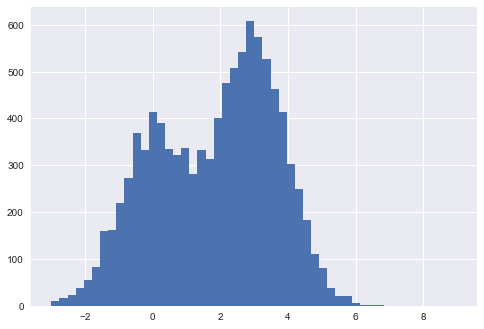

In [4]:
N = 10000

mean1 = tf.Variable(0., name='mean1')
mean2 = tf.Variable(3., name='mean2')

Gaus1 = Normal(loc=mean1, scale=1.)
Gaus2 = Normal(loc=mean2, scale=1.)
frac_1 = 0.4
frac_2 = 1 - frac_1
cat = Categorical(probs=[frac_1, frac_2])
components = [Gaus1, Gaus2]
# Gaussian mixture model
model_template = Mixture(cat=cat, components=components)

model, samples = edbench.sample_model(model_template, N)

POI = {'mean1':mean1,
       'mean2':mean2}
fit_result = edbench.fit_model(model, samples, POI)
print(fit_result)
    
plt.hist(samples, bins=50, range=(-3.0, 9.0))
plt.show()